FEATURES:

AGE - AGE OF THE PATIENT
SEX - SEX OF THE PATIENT , (1:MALE , 0: FEMALE)
EXANG - EXERCISE INCLUDE ANGIA (1=YES, 0=NO)
CAA - NUMBER OF MAJOR VESSELS (0-3)
CP - CHEST PAIN TYPE (Value 1: typical angina, Value2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
TRTBPS - RESTING BLOOD PRESSURE IN (MM|HG)
CHOL - CHOLESTROL IN (MG|DL) FETCHED VIA BMI SENSOR
FBS - (FASTING BLOOD SUGAR > 120 MG/DL) (1=TRUE, 0=FALSE)
REST-ECG -(RESTING ELECTROCARDIOGRAPHIC RESULTS) Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
THALACH -MAXIMUM HEAERT RATE ACHIEVED
OLDPEAK - PREVIOUS pEAK
SLP - SLOPE
EXNG - EXERCISE INDUCED ANGINA ~ 1 = YES, 0 = NO

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
heart = pd.read_csv('heart.csv')
o2 = pd.read_csv('o2Saturation.csv')

In [5]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

---

# Exploratory Data Analysis

No missing data

<AxesSubplot:xlabel='output', ylabel='count'>

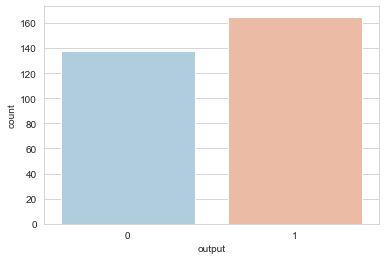

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='output',data=heart,palette='RdBu_r')

In [22]:
heart['output'].value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: output, dtype: float64

<AxesSubplot:xlabel='output', ylabel='count'>

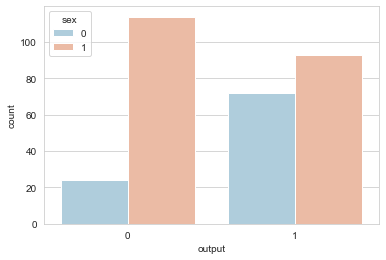

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='output',hue='sex',data=heart,palette='RdBu_r')

<AxesSubplot:xlabel='output', ylabel='count'>

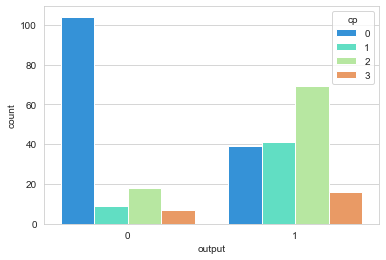

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='output',hue='cp',data=heart,palette='rainbow')

<AxesSubplot:xlabel='output', ylabel='count'>

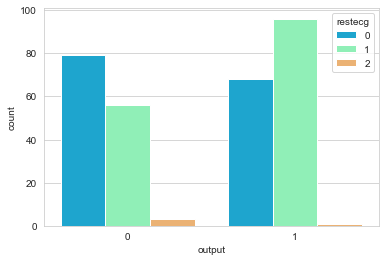

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='output',hue='restecg',data=heart,palette='rainbow')

<AxesSubplot:xlabel='output', ylabel='count'>

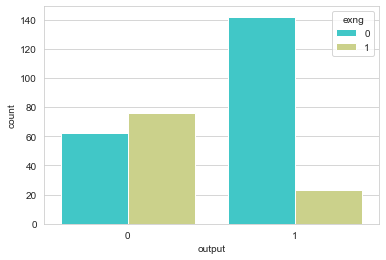

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='output',hue='exng',data=heart,palette='rainbow')

/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

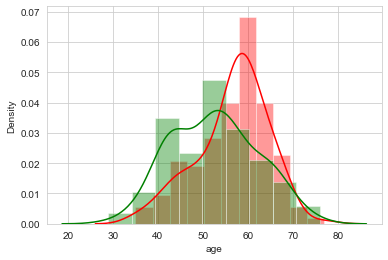

In [29]:
sns.distplot(heart[heart.output==0]['age'].dropna(),color='red')
sns.distplot(heart[heart.output==1]['age'].dropna(),color='green')

In [30]:
heart[['cp','output','age']].groupby(['cp','output']).count()

age
cp output     
0  0       104
   1        39
1  0         9
   1        41
2  0        18
   1        69
3  0         7
   1        16

In [37]:
heart[['thall','output','age']].groupby(['thall','output']).count()

age
thall output     
0     0         1
      1         1
1     0        12
      1         6
2     0        36
      1       130
3     0        89
      1        28

---

# Training and Testing

In [52]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop(['output'],axis=1), 
                                                    heart['output'], test_size=0.20, 
                                                    random_state=101)

In [117]:
lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=3)

In [74]:
# Logistic Regression and Random Forest
eclf = VotingClassifier(estimators=[('lr', lr), ('rfc', rfc)], voting='soft')

In [75]:
eclf = eclf.fit(X_train,y_train)

/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
predictions = eclf.predict(X_test)

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



In [95]:
# Random Forest
eclf = VotingClassifier(estimators=[('rf', rfc)], voting='soft')
eclf = eclf.fit(X_train,y_train)
predictions = eclf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.83      0.97      0.89        30

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.88        61
weighted avg       0.90      0.89      0.88        61



In [84]:
# Decision Tree
eclf = VotingClassifier(estimators=[('dt', dt)], voting='soft')
eclf = eclf.fit(X_train,y_train)
predictions = eclf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [119]:
# K-Nearest Neighbor
eclf = VotingClassifier(estimators=[('knn', knn)], voting='soft')
eclf = eclf.fit(X_train,y_train)
predictions = eclf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.52      0.60        31
           1       0.62      0.80      0.70        30

    accuracy                           0.66        61
   macro avg       0.67      0.66      0.65        61
weighted avg       0.67      0.66      0.65        61



In [122]:
# Logistic Regression
eclf = VotingClassifier(estimators=[('lr', lr)], voting='soft')
eclf = eclf.fit(X_train,y_train)
predictions = eclf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
#K-Means
km = KMeans(n_clusters=2)
km.fit(heart.drop('output',axis=1))
km.cluster_centers_

array([[5.30621762e+01, 7.40932642e-01, 1.05181347e+00, 1.29746114e+02,
        2.16259067e+02, 1.55440415e-01, 5.75129534e-01, 1.51818653e+02,
        2.84974093e-01, 9.73575130e-01, 1.40932642e+00, 6.68393782e-01,
        2.25906736e+00, 5.95854922e-01],
       [5.66545455e+01, 5.81818182e-01, 8.18181818e-01, 1.34918182e+02,
        2.98909091e+02, 1.36363636e-01, 4.45454545e-01, 1.45836364e+02,
        4.00000000e-01, 1.15545455e+00, 1.38181818e+00, 8.36363636e-01,
        2.40909091e+00, 4.54545455e-01]])

In [115]:
cluster = km.labels_
heart['Cluster']=heart['output'].apply(lambda x: 1 if x==1 else 0)

In [116]:
print(confusion_matrix(heart['Cluster'],km.labels_))
print('\n')
print(classification_report(heart['Cluster'],km.labels_))

[[ 78  60]
 [115  50]]


              precision    recall  f1-score   support

           0       0.40      0.57      0.47       138
           1       0.45      0.30      0.36       165

    accuracy                           0.42       303
   macro avg       0.43      0.43      0.42       303
weighted avg       0.43      0.42      0.41       303



# Random Forrest Classifier gives the best result with 0.89 accuracy